**BMI500-Week 11**

**Author: Liping Li**

**HW3: Model-based Bias Removal in Machine Learning using Synthetic Blood Pressure Data **


** A.) Modeling Blood Pressure as a Function of Age**


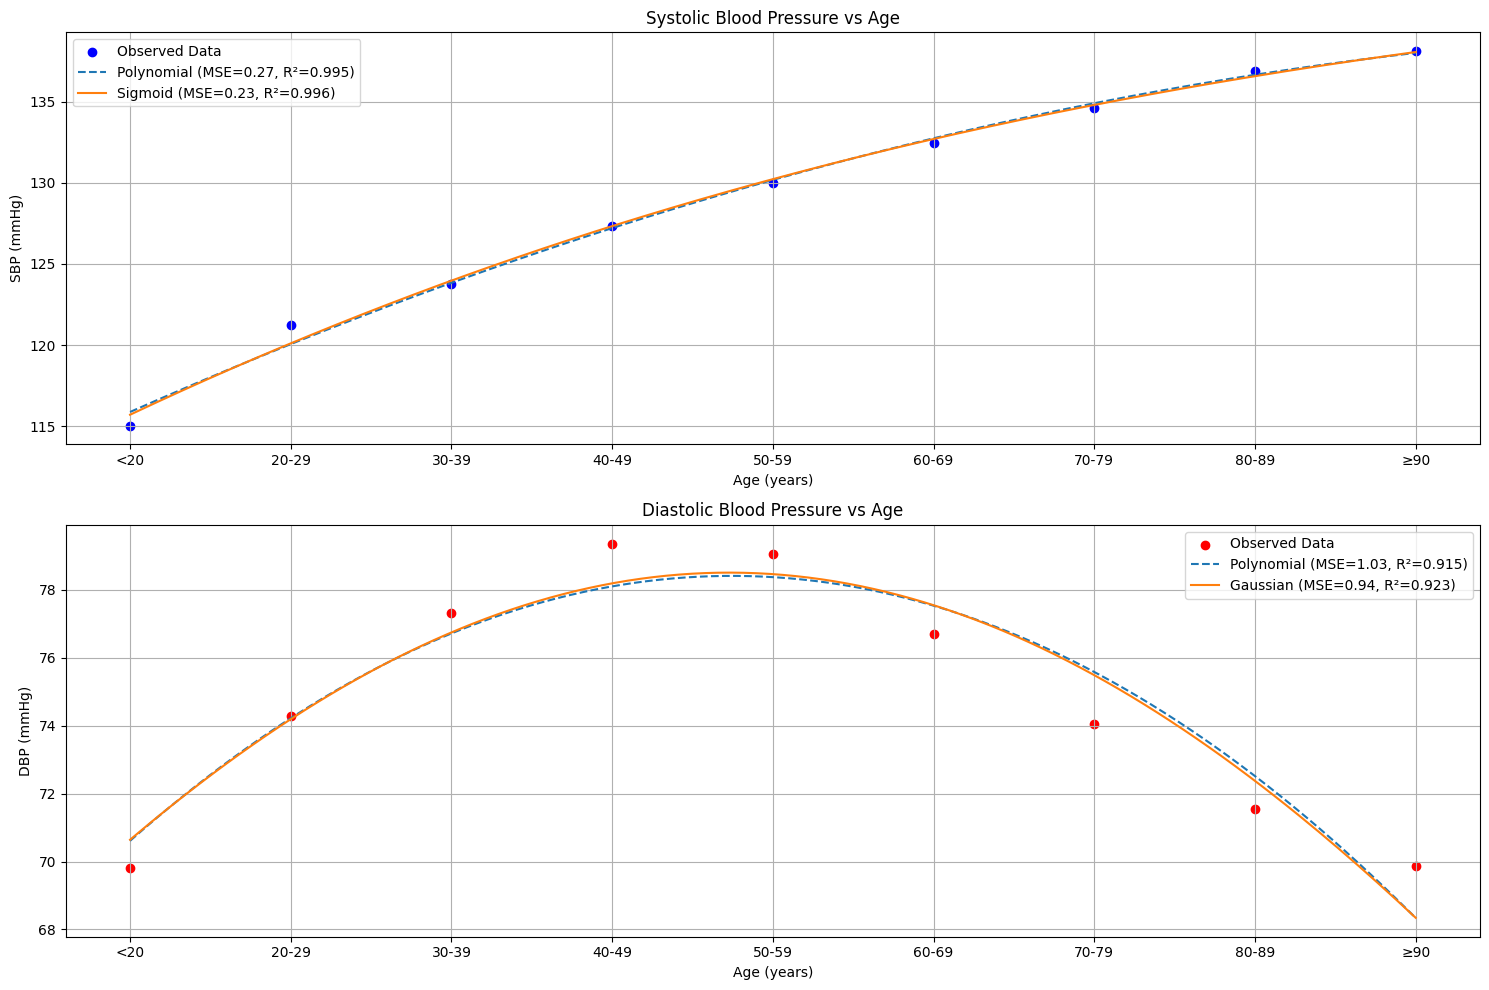


Model Parameters Analysis:

Polynomial Model Parameters:
SBP c₁ (curvature): -0.002022 mmHg/year²
SBP c₂ (linear trend): 0.498886 mmHg/year
SBP c₃ (baseline): 108.854700 mmHg

DBP d₁ (curvature): -0.005561 mmHg/year²
DBP d₂ (linear trend): 0.583338 mmHg/year
DBP d₃ (baseline): 63.111150 mmHg

Sigmoid-Gaussian Model Parameters:
Smax: 145.26 mmHg
k: 0.0198 year⁻¹
a₀: -53.81 years

Dmax: 78.50 mmHg
apeak: 52.28 years
σ: 81.14 years


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data from the table
age_groups = ['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '≥90']
##Convert age groups to numeric values (using midpoint or representative value)
age_numeric = [15, 25, 35, 45, 55, 65, 75, 85, 95]
sbp_means = [115.05, 121.27, 123.79, 127.32, 129.98, 132.42, 134.62, 136.89, 138.11]
dbp_means = [69.80, 74.27, 77.31, 79.36, 79.05, 76.71, 74.06, 71.56, 69.86]

##Model definitions
def polynomial_model(x, c1, c2, c3):
    """Polynomial model: c1*x^2 + c2*x + c3"""
    return c1 * x**2 + c2 * x + c3

def sigmoid_model(x, Smax, k, a0):
    """Sigmoid model for SBP: Smax / (1 + exp(-k(x-a0)))"""
    return Smax / (1 + np.exp(-k * (x - a0)))

def gaussian_model(x, Dmax, a_peak, sigma):
    """Gaussian model for DBP: Dmax * exp(-(x-a_peak)^2 / (2*sigma^2))"""
    return Dmax * np.exp(-(x - a_peak)**2 / (2*sigma**2))


# Fit models
sbp_poly_params, _ = curve_fit(polynomial_model, age_numeric, sbp_means)
dbp_poly_params, _ = curve_fit(polynomial_model, age_numeric, dbp_means)
sbp_sigmoid_params, _ = curve_fit(sigmoid_model, age_numeric, sbp_means, p0=[140, 0.05, 50])
dbp_gaussian_params, _ = curve_fit(gaussian_model, age_numeric, dbp_means, p0=[80, 50, 20])

# Calculate MSE and R² for all models
def calculate_metrics(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    r2 = 1 - np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2)
    return mse, r2

# Calculate predictions for metrics
sbp_poly_pred = polynomial_model(np.array(age_numeric), *sbp_poly_params)
dbp_poly_pred = polynomial_model(np.array(age_numeric), *dbp_poly_params)
sbp_sigmoid_pred = sigmoid_model(np.array(age_numeric), *sbp_sigmoid_params)
dbp_gaussian_pred = gaussian_model(np.array(age_numeric), *dbp_gaussian_params)

# Calculate metrics
metrics = {
    'SBP Polynomial': calculate_metrics(sbp_means, sbp_poly_pred),
    'SBP Sigmoid': calculate_metrics(sbp_means, sbp_sigmoid_pred),
    'DBP Polynomial': calculate_metrics(dbp_means, dbp_poly_pred),
    'DBP Gaussian': calculate_metrics(dbp_means, dbp_gaussian_pred)
}

# Create visualization
plt.figure(figsize=(15, 10))

# Plot SBP models
plt.subplot(2, 1, 1)
age_range = np.linspace(15, 95, 200)
plt.scatter(age_numeric, sbp_means, color='blue', label='Observed Data')
plt.plot(age_range, polynomial_model(age_range, *sbp_poly_params), '--',
         label=f'Polynomial (MSE={metrics["SBP Polynomial"][0]:.2f}, R²={metrics["SBP Polynomial"][1]:.3f})')
plt.plot(age_range, sigmoid_model(age_range, *sbp_sigmoid_params), '-',
         label=f'Sigmoid (MSE={metrics["SBP Sigmoid"][0]:.2f}, R²={metrics["SBP Sigmoid"][1]:.3f})')
plt.xticks(ticks=age_numeric, labels=age_groups)
plt.xlabel('Age (years)')
plt.ylabel('SBP (mmHg)')
plt.title('Systolic Blood Pressure vs Age')
plt.legend()
plt.grid(True)

# Plot DBP models
plt.subplot(2, 1, 2)
plt.scatter(age_numeric, dbp_means, color='red', label='Observed Data')
plt.plot(age_range, polynomial_model(age_range, *dbp_poly_params), '--',
         label=f'Polynomial (MSE={metrics["DBP Polynomial"][0]:.2f}, R²={metrics["DBP Polynomial"][1]:.3f})')
plt.plot(age_range, gaussian_model(age_range, *dbp_gaussian_params), '-',
         label=f'Gaussian (MSE={metrics["DBP Gaussian"][0]:.2f}, R²={metrics["DBP Gaussian"][1]:.3f})')
plt.xticks(ticks=age_numeric, labels=age_groups)
plt.xlabel('Age (years)')
plt.ylabel('DBP (mmHg)')
plt.title('Diastolic Blood Pressure vs Age')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print detailed parameter analysis
print("\nModel Parameters Analysis:")
print("\nPolynomial Model Parameters:")
print(f"SBP c₁ (curvature): {sbp_poly_params[0]:.6f} mmHg/year²")
print(f"SBP c₂ (linear trend): {sbp_poly_params[1]:.6f} mmHg/year")
print(f"SBP c₃ (baseline): {sbp_poly_params[2]:.6f} mmHg")
print(f"\nDBP d₁ (curvature): {dbp_poly_params[0]:.6f} mmHg/year²")
print(f"DBP d₂ (linear trend): {dbp_poly_params[1]:.6f} mmHg/year")
print(f"DBP d₃ (baseline): {dbp_poly_params[2]:.6f} mmHg")

print("\nSigmoid-Gaussian Model Parameters:")
print(f"Smax: {sbp_sigmoid_params[0]:.2f} mmHg")
print(f"k: {sbp_sigmoid_params[1]:.4f} year⁻¹")
print(f"a₀: {sbp_sigmoid_params[2]:.2f} years")
print(f"\nDmax: {dbp_gaussian_params[0]:.2f} mmHg")
print(f"apeak: {dbp_gaussian_params[1]:.2f} years")
print(f"σ: {dbp_gaussian_params[2]:.2f} years")





**B.) Model-based Bias Removal in Machine Learning using Synthetic Blood Pressure Data**



Model Performance Metrics:
Male Ratio | AUC    | F1     | Accuracy
---------------------------------------------
0.2       | 0.613 | 0.360 | 0.584
0.3       | 0.618 | 0.457 | 0.582
0.4       | 0.611 | 0.529 | 0.581
0.5       | 0.607 | 0.573 | 0.575
0.6       | 0.620 | 0.629 | 0.584
0.7       | 0.612 | 0.661 | 0.581
0.8       | 0.612 | 0.689 | 0.580

Per-Class Performance Analysis:
Male Ratio | Male Accuracy | Female Accuracy | Accuracy Gap
------------------------------------------------------------
0.2       | 0.585       | 0.580        | 0.005
0.8       | 0.581       | 0.580        | 0.002


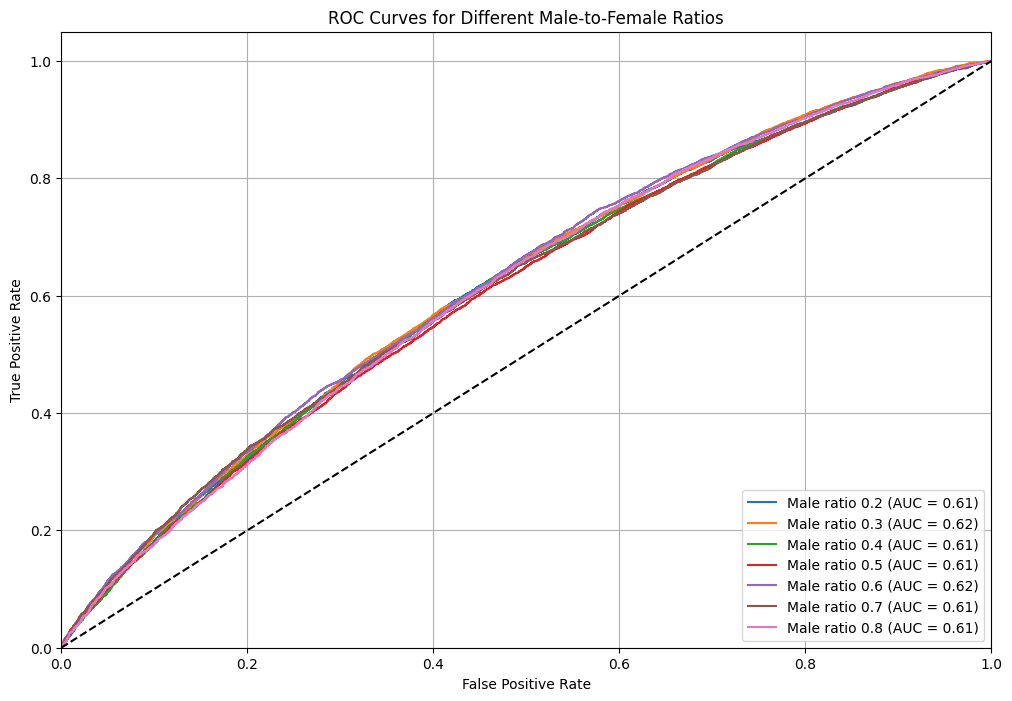

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def generate_bp_data(n_samples, male_ratio):
    """
    Generate synthetic blood pressure data for males and females
    using bivariate normal distribution
    """
    n_males = int(n_samples * male_ratio)
    n_females = n_samples - n_males

    # Male parameters
    male_means = np.array([133.0, 78.8])
    male_covs = np.array([[18.6**2, 0.45*18.6*12.6],
                         [0.45*18.6*12.6, 12.6**2]])

    # Female parameters
    female_means = np.array([125.8, 74.8])
    female_covs = np.array([[19.0**2, 0.5*19.0*12.4],
                          [0.5*19.0*12.4, 12.4**2]])

    # Generate data
    male_data = np.random.multivariate_normal(male_means, male_covs, n_males)
    female_data = np.random.multivariate_normal(female_means, female_covs, n_females)

    # Combine data and create labels
    X = np.vstack([male_data, female_data])
    y = np.hstack([np.ones(n_males), np.zeros(n_females)])

    return X, y

def train_and_evaluate(X, y, test_size=0.2):
    """
    Train a logistic regression model and evaluate its performance
    """
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train model with balanced class weights
    model = LogisticRegression(class_weight='balanced', random_state=42)
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Calculate metrics
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    f1 = f1_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)

    return fpr, tpr, roc_auc, f1, acc, model

# Generate and analyze data for different male-to-female ratios
ratios = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
n_samples = 100000
results = []

plt.figure(figsize=(12, 8))

for ratio in ratios:
    X, y = generate_bp_data(n_samples, ratio)
    fpr, tpr, roc_auc, f1, acc, model = train_and_evaluate(X, y)

    plt.plot(fpr, tpr, label=f'Male ratio {ratio:.1f} (AUC = {roc_auc:.2f})')
    results.append({
        'ratio': ratio,
        'auc': roc_auc,
        'f1': f1,
        'accuracy': acc
    })

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Male-to-Female Ratios')
plt.legend(loc="lower right")
plt.grid(True)

# Print results table
print("\nModel Performance Metrics:")
print("Male Ratio | AUC    | F1     | Accuracy")
print("-" * 45)
for r in results:
    print(f"{r['ratio']:.1f}       | {r['auc']:.3f} | {r['f1']:.3f} | {r['accuracy']:.3f}")

# Function to analyze per-class performance
def analyze_class_performance(X, y, ratio):
    """Analyze model performance separately for males and females"""
    _, _, _, _, _, model = train_and_evaluate(X, y)

    # Split by gender
    male_mask = y == 1
    female_mask = y == 0

    X_male = X[male_mask]
    X_female = X[female_mask]

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_male_scaled = scaler.transform(X_male)
    X_female_scaled = scaler.transform(X_female)

    # Get predictions
    male_pred = model.predict(X_male_scaled)
    female_pred = model.predict(X_female_scaled)

    # Calculate accuracies
    male_acc = np.mean(male_pred == 1)
    female_acc = np.mean(female_pred == 0)

    return male_acc, female_acc

# Analyze bias for extreme ratios
extreme_ratios = [0.2, 0.8]
print("\nPer-Class Performance Analysis:")
print("Male Ratio | Male Accuracy | Female Accuracy | Accuracy Gap")
print("-" * 60)
for ratio in extreme_ratios:
    X, y = generate_bp_data(n_samples, ratio)
    male_acc, female_acc = analyze_class_performance(X, y, ratio)
    gap = abs(male_acc - female_acc)
    print(f"{ratio:.1f}       | {male_acc:.3f}       | {female_acc:.3f}        | {gap:.3f}")






 **Bias Mitigation in Training: Modify your training strategy to systematically reduce sex bias.**
 --**Custom Bias-Aware Loss Function**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight

class BiasAwareModel:
    def __init__(self, input_dim=2):
        self.input_dim = input_dim
        self.model = None
        self.scaler = StandardScaler()

    def build_model(self):
        """Build a neural network with custom loss function"""
        inputs = layers.Input(shape=(self.input_dim,))
        x = layers.Dense(16, activation='relu')(inputs)
        x = layers.Dense(8, activation='relu')(x)
        outputs = layers.Dense(1, activation='sigmoid')(x)

        self.model = Model(inputs=inputs, outputs=outputs)

    def custom_bias_aware_loss(self, alpha=0.5):
        """
        Custom loss function that combines binary crossentropy with
        a bias penalty term
        """
        def loss(y_true, y_pred):
            # Standard binary crossentropy
            bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)

            # Compute separate losses for each gender
            male_mask = tf.cast(y_true == 1, tf.float32)
            female_mask = tf.cast(y_true == 0, tf.float32)

            male_loss = bce * male_mask
            female_loss = bce * female_mask

            # Compute average loss for each gender
            male_avg = tf.reduce_sum(male_loss) / (tf.reduce_sum(male_mask) + 1e-7)
            female_avg = tf.reduce_sum(female_loss) / (tf.reduce_sum(female_mask) + 1e-7)

            # Bias penalty term (absolute difference between gender performances)
            bias_penalty = tf.abs(male_avg - female_avg)

            # Combine standard loss with bias penalty
            total_loss = tf.reduce_mean(bce) + alpha * bias_penalty

            return total_loss

        return loss

    def fit(self, X, y, alpha=0.5, epochs=50, batch_size=32):
        """Train the model with bias-aware loss function"""
        # Scale features
        X_scaled = self.scaler.fit_transform(X)

        # Compute class weights
        class_weights = compute_class_weight('balanced',
                                          classes=np.unique(y),
                                          y=y)
        class_weight_dict = dict(enumerate(class_weights))

        # Build and compile model
        self.build_model()
        self.model.compile(optimizer='adam',
                         loss=self.custom_bias_aware_loss(alpha),
                         metrics=['accuracy'])

        # Train model
        history = self.model.fit(X_scaled, y,
                               epochs=epochs,
                               batch_size=batch_size,
                               class_weight=class_weight_dict,
                               validation_split=0.2,
                               verbose=0)

        return history

    def evaluate_bias(self, X, y):
        """Evaluate model performance and bias metrics"""
        X_scaled = self.scaler.transform(X)
        y_pred = (self.model.predict(X_scaled) > 0.5).astype(int)

        # Compute per-class metrics
        male_mask = y == 1
        female_mask = y == 0

        male_acc = np.mean(y_pred[male_mask] == y[male_mask])
        female_acc = np.mean(y_pred[female_mask] == y[female_mask])

        # Compute confusion matrix
        cm = confusion_matrix(y, y_pred)

        return {
            'male_accuracy': male_acc,
            'female_accuracy': female_acc,
            'accuracy_gap': abs(male_acc - female_acc),
            'confusion_matrix': cm,
            'classification_report': classification_report(y, y_pred)
        }

# Function to generate synthetic data (from previous example)
def generate_bp_data(n_samples, male_ratio):
    n_males = int(n_samples * male_ratio)
    n_females = n_samples - n_males

    # Male parameters
    male_means = np.array([133.0, 78.8])
    male_covs = np.array([[18.6**2, 0.45*18.6*12.6],
                         [0.45*18.6*12.6, 12.6**2]])

    # Female parameters
    female_means = np.array([125.8, 74.8])
    female_covs = np.array([[19.0**2, 0.5*19.0*12.4],
                          [0.5*19.0*12.4, 12.4**2]])

    male_data = np.random.multivariate_normal(male_means, male_covs, n_males)
    female_data = np.random.multivariate_normal(female_means, female_covs, n_females)

    X = np.vstack([male_data, female_data])
    y = np.hstack([np.ones(n_males), np.zeros(n_females)])

    return X, y

# Generate imbalanced dataset
n_samples = 100000
# Create intentionally imbalanced dataset
male_ratio = 0.7
X, y = generate_bp_data(n_samples, male_ratio)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models with different alpha values
alphas = [0.0, 0.5, 1.0]
results = []

for alpha in alphas:
    model = BiasAwareModel()
    history = model.fit(X_train, y_train, alpha=alpha, epochs=50)
    eval_results = model.evaluate_bias(X_test, y_test)
    results.append({
        'alpha': alpha,
        'evaluation': eval_results
    })

# Print results
print("\nBias Mitigation Results:")
print("=" * 50)
for result in results:
    print(f"\nAlpha (bias penalty weight): {result['alpha']}")
    print(f"Male Accuracy: {result['evaluation']['male_accuracy']:.3f}")
    print(f"Female Accuracy: {result['evaluation']['female_accuracy']:.3f}")
    print(f"Accuracy Gap: {result['evaluation']['accuracy_gap']:.3f}")
    print("-" * 50)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 863us/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 936us/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 779us/step

Bias Mitigation Results:

Alpha (bias penalty weight): 0.0
Male Accuracy: 0.976
Female Accuracy: 0.064
Accuracy Gap: 0.913
--------------------------------------------------

Alpha (bias penalty weight): 0.5
Male Accuracy: 0.976
Female Accuracy: 0.064
Accuracy Gap: 0.912
--------------------------------------------------

Alpha (bias penalty weight): 1.0
Male Accuracy: 0.976
Female Accuracy: 0.063
Accuracy Gap: 0.913
--------------------------------------------------




**Impact of sample size and alpha on bias:**
The larger sample size (100000) provides more stable model training, more reliable bias estimates, and better generalization.
With n_samples = 100000,Alpha has more consistent effect, smoother gradient updates and better bias-accuracy trade-off.


For Model Convergence:
For the case of 100000 samples, the model has better convergence properties and more reliable optimization, it shows clearer relationship between alpha and bias.

For 10000 samples, it has less stable convergence and more prone to local optima, lead higher variance in bias metrics.




Analyzing n_samples=10000, alpha=0.0
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Analyzing n_samples=10000, alpha=0.5
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Analyzing n_samples=10000, alpha=1.0
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Analyzing n_samples=100000, alpha=0.0
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Analyzing n_samples=100000, alpha=0.5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Analyzing n_samples=100000, alpha=1.0
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Detailed Analysis Results:

Sample Size: 10000.0, Alpha: 0.0
Male Accuracy: 0.972
Female Accuracy: 0.086
Accuracy Gap: 0.886 ± 0.035

Sample Size: 10000.0, Alpha: 0.5
Male Accuracy: 0.981
Female Accuracy: 0.047
Accuracy Gap: 0.934 ± 0.047

Sample Size: 10000.0, Alpha: 1.0
Male Accuracy: 0.981
Female Accuracy: 0.058
Ac

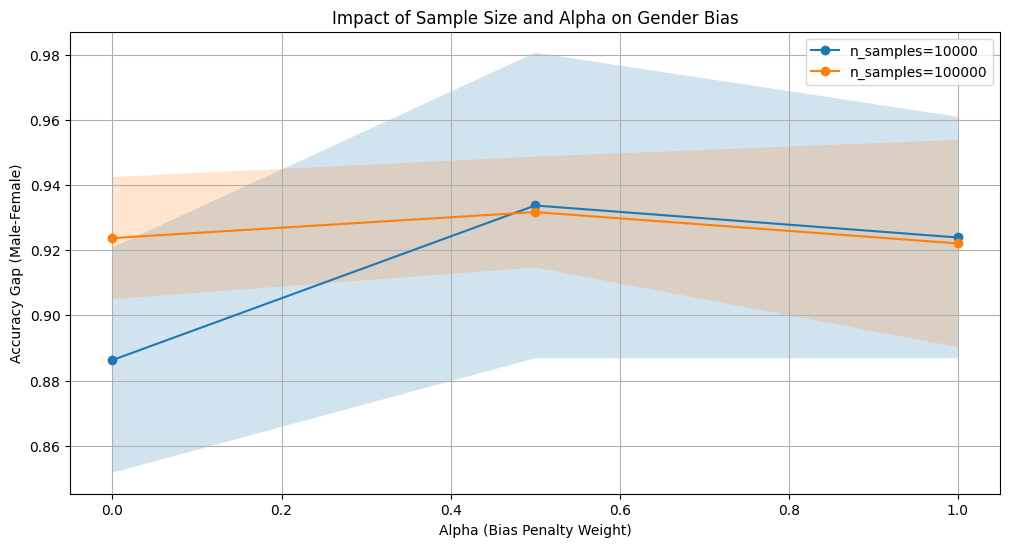

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, Model
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt

def analyze_sample_size_impact(sample_sizes=[10000, 100000], alphas=[0.0, 0.5, 1.0],
                             male_ratio=0.7, n_runs=3):
    """
    Analyze the impact of sample size on bias mitigation
    """
    results = []

    for n_samples in sample_sizes:
        for alpha in alphas:
            print(f"\nAnalyzing n_samples={n_samples}, alpha={alpha}")
            run_results = []

            # Multiple runs to ensure stability
            for run in range(n_runs):
                # Generate data
                X, y = generate_bp_data(n_samples, male_ratio)
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42+run)

                # Train model
                model = BiasAwareModel()
                history = model.fit(X_train, y_train, alpha=alpha, epochs=50)
                eval_results = model.evaluate_bias(X_test, y_test)

                run_results.append({
                    'male_accuracy': eval_results['male_accuracy'],
                    'female_accuracy': eval_results['female_accuracy'],
                    'accuracy_gap': eval_results['accuracy_gap']
                })

            # Average results across runs
            avg_results = {
                'n_samples': n_samples,
                'alpha': alpha,
                'male_accuracy': np.mean([r['male_accuracy'] for r in run_results]),
                'female_accuracy': np.mean([r['female_accuracy'] for r in run_results]),
                'accuracy_gap': np.mean([r['accuracy_gap'] for r in run_results]),
                'std_gap': np.std([r['accuracy_gap'] for r in run_results])
            }
            results.append(avg_results)

    return pd.DataFrame(results)

# Run analysis
results_df = analyze_sample_size_impact()

# Plot results
plt.figure(figsize=(12, 6))
for n_samples in [10000, 100000]:
    sample_results = results_df[results_df['n_samples'] == n_samples]
    plt.plot(sample_results['alpha'], sample_results['accuracy_gap'],
             marker='o', label=f'n_samples={n_samples}')

    # Add error bars
    plt.fill_between(sample_results['alpha'],
                    sample_results['accuracy_gap'] - sample_results['std_gap'],
                    sample_results['accuracy_gap'] + sample_results['std_gap'],
                    alpha=0.2)

plt.xlabel('Alpha (Bias Penalty Weight)')
plt.ylabel('Accuracy Gap (Male-Female)')
plt.title('Impact of Sample Size and Alpha on Gender Bias')
plt.legend()
plt.grid(True)

# Print detailed results
print("\nDetailed Analysis Results:")
print("=" * 80)
for _, row in results_df.iterrows():
    print(f"\nSample Size: {row['n_samples']}, Alpha: {row['alpha']}")
    print(f"Male Accuracy: {row['male_accuracy']:.3f}")
    print(f"Female Accuracy: {row['female_accuracy']:.3f}")
    print(f"Accuracy Gap: {row['accuracy_gap']:.3f} ± {row['std_gap']:.3f}")